In [14]:
from vrpy import VehicleRoutingProblem
import networkx as nx

In [26]:
G = nx.DiGraph()
G.add_nodes_from([
    "Source",
    "Sink",
    ("node01", {'demand': 10, 'lower': 0, 'upper': 10}),
    ("node02", {'demand': 10, 'lower': 0, 'upper': 10}),
    ("node03", {'demand': 10, 'lower': 30, 'upper': 40})
])
G.add_edges_from([
    ("Source", "node01", {'cost': 10, 'time': 10}),
    ("Source", "node02", {'cost': 10, 'time': 10}),
    ("Source", "node03", {'cost': 10, 'time': 10}),
    ("node01", "Sink",   {'cost': 10, 'time': 10}),
    ("node01", "node02", {'cost': 20, 'time': 20}),
    ("node01", "node03", {'cost': 0,  'time': 0}),
    ("node02", "Sink",   {'cost': 10, 'time': 10}),
    ("node02", "node01", {'cost': 20, 'time': 20}),
    ("node02", "node03", {'cost': 10, 'time': 10}),
    ("node03", "Sink",   {'cost': 10, 'time': 10}),
    ("node03", "node01", {'cost': 0,  'time': 0}),
    ("node03", "node02", {'cost': 10, 'time': 10})
])


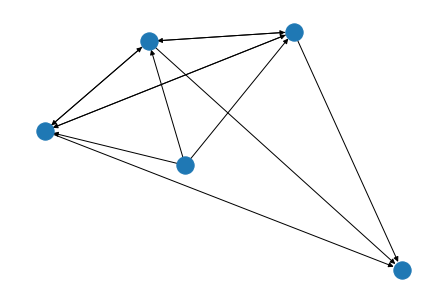

In [27]:
nx.draw(G)

In [28]:
%%capture
prob = VehicleRoutingProblem(G, load_capacity=20)
prob.duration = 50
prob.time_windows = True
prob.solve()

INFO:vrpy.vrp:new upper bound : max num stops = 4
INFO:vrpy.vrp:iteration 0, 60.0
INFO:vrpy.vrp:iteration 1, 40.0
INFO:vrpy.vrp:iteration 2, 40.0
INFO:vrpy.master_solve_pulp:total cost = 40.0


In [29]:
print(prob.best_routes)
print(prob.arrival_time)
print(prob.best_routes_duration)

{1: ['Source', 'node02', 'Sink'], 2: ['Source', 'node01', 'node03', 'Sink']}
{1: {'Source': 0, 'node02': 10, 'Sink': 20}, 2: {'Source': 0, 'node01': 10, 'node03': 30, 'Sink': 40}}
{1: 20, 2: 20}


In [35]:
G = nx.DiGraph()
G.add_nodes_from([
    "Source",
    "Sink",
    ("node01", {'demand': 10, 'lower': 0, 'upper': 10}),
    ("node02", {'demand': 10, 'lower': 0, 'upper': 10}),
    ("node03", {'demand': 10, 'lower': 40, 'upper': 50})
])
G.add_edges_from([
    ("Source", "node01", {'cost': 10, 'time': 10}),
    ("Source", "node02", {'cost': 10, 'time': 10}),
    ("Source", "node03", {'cost': 10, 'time': 10}),
    ("node01", "Sink",   {'cost': 10, 'time': 10}),
    ("node01", "node02", {'cost': 20, 'time': 20}),
    ("node01", "node03", {'cost': 0,  'time': 0}),
    ("node02", "Sink",   {'cost': 10, 'time': 10}),
    ("node02", "node01", {'cost': 20, 'time': 20}),
    ("node02", "node03", {'cost': 10, 'time': 10}),
    ("node03", "Sink",   {'cost': 10, 'time': 10}),
    ("node03", "node01", {'cost': 0,  'time': 0}),
    ("node03", "node02", {'cost': 10, 'time': 10})
])

prob = VehicleRoutingProblem(G, load_capacity=20, duration=40, time_windows=True)
prob.solve()

print(prob.best_routes)
print(prob.arrival_time)
print(prob.best_routes_duration)

INFO:vrpy.vrp:new upper bound : max num stops = 4
INFO:vrpy.vrp:iteration 0, 60.0
INFO:vrpy.vrp:iteration 1, 40.0
INFO:vrpy.vrp:iteration 2, 40.0
INFO:vrpy.master_solve_pulp:total cost = 40.0


{1: ['Source', 'node02', 'Sink'], 2: ['Source', 'node01', 'node03', 'Sink']}
{1: {'Source': 0, 'node02': 10, 'Sink': 20}, 2: {'Source': 0, 'node01': 10, 'node03': 40, 'Sink': 50}}
{1: 20, 2: 20}
